<a href="https://colab.research.google.com/github/tote93/Big-Data-SVR/blob/development/SVR_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install svn package to download folder, working on linux systems
package = ! dpkg -s subversion | grep Status
if "Status: install ok installed" not in package:
  !sudo apt-get install subversion
# Download dataset folders from github
! svn checkout https://github.com/tote93/Big-Data-SVR/trunk/dataset/

Checked out revision 7.


# 1. Import the Libraries

In [2]:
#To handle data in the form of rows and columns
import pandas as pd
#For numerical libraries
import numpy as np
# Import Path for move files
from pathlib import Path
# Avoid show warning msg
import warnings
# Measure time and generate files libraries
import os, time
# Check if file has a word in filename
import fnmatch 
# Sklearn libraries for ml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# Sklearn libraries for testint models
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import linear_model
# Sklearn standarScale libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score, mean_squared_error, make_scorer, mean_absolute_error
# Support Vector Regressor library
from sklearn.svm import SVR
# Graphic and plot libraries
from matplotlib import pyplot
#importing ploting libraries
import matplotlib.pyplot as plt
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns
#Datetime libraries to transform attr Date
from datetime import timedelta, date
from datetime import datetime
# Plotly library
import plotly.express as px
# To create figures in plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Plot and seaborn configuration
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
warnings.filterwarnings('ignore')
# Add posibles missing values to search in the dataset
missing_values = ["n/a", "na", "--", "?", "NaN"]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Processing all dataset files

# Compute all new files to merge into a month file

In [0]:
# Generate dirs if not exists
if Path('file_output').exists() == False:
  os.makedirs('file_output')
  os.makedirs('dataset/final')
# Open all files from march
df1 = pd.read_excel("dataset/original/temperature1 march.xls")
df2 = pd.read_excel("dataset/original/temperature2 march.xls")
df3 = pd.read_excel("dataset/original/humidity march.xls")
df4 = pd.read_excel("dataset/original/CO2 march.xls")
# Rename column and add new colums from other datasets
df1 = df1.rename(columns={"Y_Value": "Temp1"})
df1['Temp2'] = df2['Y_Value']
df1['Humi'] = df3['Y_Value']
df1['CO2'] = df4['Y_Value']
# Finally export to a new dataset
df1.to_csv("file_output/march_output.csv", index=False, header=True, decimal=".", sep=",", float_format='%.2f')

# Open all files from april
df1 = pd.read_excel("dataset/original/temperature1 april.xls")
df2 = pd.read_excel("dataset/original/temperature2 april.xls")
df3 = pd.read_excel("dataset/original/humidity april.xls")
df4 = pd.read_excel("dataset/original/co2 april.xls")
# Rename column and add the other attirbutes
df1 = df1.rename(columns={"Y_Value": "Temp1"})
df1['Temp2'] = df2['Y_Value']
df1['Humi'] = df3['Y_Value']
df1['CO2'] = df4['Y_Value']
# Export to a new dataset
df1.to_csv("file_output/april_output.csv", index=False, header=True, decimal=".", sep=",", float_format='%.2f')

# Load the dataset

In [0]:
#reading the CSV file into pandas dataframe
data = pd.read_csv("file_output/april_output.csv", na_values = missing_values, sep=",", date_parser=lambda x: datetime.strptime(x, '%d.%m.%Y %H:%M:%S'))

In [5]:
#Check top few records of the dataset
data.head()

Date  Temp1  Temp2   Humi     CO2
0  1.4.2019 1:59:59  24.66   23.3  27.84  424.96
1  1.4.2019 2:00:59  24.64   23.3  27.84  424.96
2  1.4.2019 2:01:59  24.66   23.3  27.84  422.72
3  1.4.2019 2:02:59  24.64   23.3  27.84  421.76
4  1.4.2019 2:03:59  24.64   23.3  27.84  419.84

*   It shows that there are four independent variables ( Date, Temp1, Temp2, Humi) and one dependent variable (CO2).
*   All the records are numeric but Date attribute.

In [6]:
#Check the last few records of the dataset
data.tail()

Date  Temp1  Temp2  Humi  CO2
32490  25.4.2019 16:12:50  27.64    NaN  34.9  NaN
32491  25.4.2019 16:13:50  27.62    NaN  34.9  NaN
32492  25.4.2019 16:14:50  27.62    NaN  34.9  NaN
32493  25.4.2019 16:15:50  27.62    NaN  34.9  NaN
32494  25.4.2019 16:16:50  27.62    NaN  34.9  NaN

# 3. Exploratory data quality report April Dataset


In [7]:
#To show the detailed summary 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32495 entries, 0 to 32494
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    32495 non-null  object 
 1   Temp1   32495 non-null  float64
 2   Temp2   32171 non-null  float64
 3   Humi    32495 non-null  float64
 4   CO2     32214 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.2+ MB


*   It gives the details about the number of rows (32495), number of columns (5), data types information, all columns are float type. 
*   Memory usage is 1.2 MB+. Also,there are no null values in the data.

In [8]:
# Data types information
data.dtypes

Date      object
Temp1    float64
Temp2    float64
Humi     float64
CO2      float64
dtype: object

*   It gives the data types of each column of the dataset

In [9]:
#To get the shape 
data.shape

(32495, 5)

*   It gives the details of the number of rows and columns present in the dataset.
*   There are 35418 rows and 5 columns.

In [10]:
#Analyze the distribution of the dataset
data.describe().T

count        mean         std     min     25%     50%     75%      max
Temp1  32495.0   26.281151    1.247082   22.32   25.22   26.48   27.44    29.24
Temp2  32171.0   25.002008    1.202650   20.90   24.10   25.20   26.10    27.50
Humi   32495.0   27.184418    2.895843   17.65   26.67   26.67   27.84    60.00
CO2    32214.0  538.475386  157.487612  342.72  427.84  481.92  596.80  1332.48

*   It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) and count of the columns of the dataset.

In [11]:
df = data.copy()
df['Date'] = pd.to_datetime(df['Date'])

fig = make_subplots(rows=2, cols=2, start_cell="bottom-left")

fig.add_trace(go.Scatter(x=list(data['Date']), y=list(data['Temp1']), name='Temp1'), row=1, col=1)
fig.add_trace(go.Scatter(x=list(data['Date']), y=list(data['Temp2']), name='Temp2'), row=1, col=2)
fig.add_trace(go.Scatter(x=list(data['Date']), y=list(data['Humi']), name='Humidity'), row=2, col=1)
fig.add_trace(go.Scatter(x=list(data['Date']), y=list(data['CO2']), name='CO2'), row=2, col=2)

fig['layout']['xaxis1'].update(title='Date', showticklabels=False)
fig['layout']['xaxis2'].update(title='Date', showticklabels=False)
fig['layout']['xaxis3'].update(title='Date', showticklabels=False)
fig['layout']['xaxis4'].update(title='Date', showticklabels=False)

fig['layout']['yaxis1'].update(title='ºC', showticklabels=True)
fig['layout']['yaxis2'].update(title='ºC', showticklabels=True)
fig['layout']['yaxis3'].update(title='%', showticklabels=True)
fig['layout']['yaxis4'].update(title='ppm', showticklabels=True)

fig.update_layout(
    height=900, 
    width=1100, 
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    ),
    title_text="Attribute Representation",
    showlegend=False)
fig.show()

### Description of independent attributes
#### Temp1
Range of values observed

In [12]:
print('Range of values:', data['Temp1'].max()-data['Temp1'].min())

Range of values: 6.919999999999998


Central values

In [13]:
print('Minimum temp1:', data['Temp1'].min())
print('Maximum temp1:',data['Temp1'].max())
print('Mean value:', data['Temp1'].mean())
print('Median value:',data['Temp1'].median())
print('Standard deviation:', data['Temp1'].std())

Minimum temp1: 22.32
Maximum temp1: 29.24
Mean value: 26.281150946299576
Median value: 26.48
Standard deviation: 1.2470823282996375


Quartiles

In [14]:
Q1=data['Temp1'].quantile(q=0.25)
Q3=data['Temp1'].quantile(q=0.75)
print('1st Quartile (Q1) is:', Q1)
print('3st Quartile (Q3) is:' , Q3)
print('Interquartile range (IQR) is', Q3-Q1)

1st Quartile (Q1) is: 25.22
3st Quartile (Q3) is: 27.44
Interquartile range (IQR) is 2.2200000000000024


Outlier detection from Interquartile range (IQR) in original data

In [15]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in temp1:', L_outliers)
print('Upper outliers in temp1:', U_outliers)

Lower outliers in temp1: 21.889999999999993
Upper outliers in temp1: 30.770000000000003


In [16]:
print('Number of outliers in temp1 upper:', data[data['Temp1']>30.74]['Temp1'].count())
print('Number of outliers in temp1 lower:', data[data['Temp1']<21.94]['Temp1'].count())
print('% of Outlier in temp1 upper:',round(data[data['Temp1']>30.74]['Temp1'].count()*100/len(data)), '%')
print('% of Outlier in temp1 lower:',round(data[data['Temp1']<21.94]['Temp1'].count()*100/len(data)), '%')

Number of outliers in temp1 upper: 0
Number of outliers in temp1 lower: 0
% of Outlier in temp1 upper: 0.0 %
% of Outlier in temp1 lower: 0.0 %


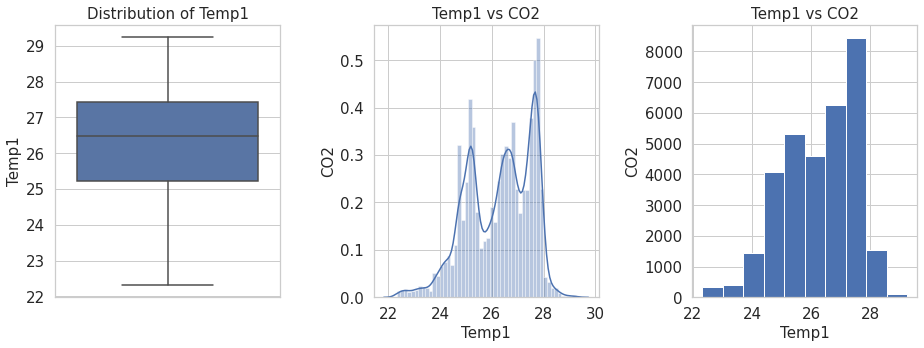

In [17]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Temp1',data=data,orient='v',ax=ax1)
ax1.set_ylabel('Temp1', fontsize=15)
ax1.set_title('Distribution of Temp1', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(data['Temp1'],ax=ax2)
ax2.set_xlabel('Temp1', fontsize=15)
ax2.set_ylabel('CO2', fontsize=15)
ax2.set_title('Temp1 vs CO2', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data['Temp1'])
ax3.set_xlabel('Temp1', fontsize=15)
ax3.set_ylabel('CO2', fontsize=15)
ax3.set_title('Temp1 vs CO2', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [18]:
fig = px.line(data, x='Date', y='Temp1')
fig.show()

**TEMP2**

Range of values observed

In [19]:
print('Range of values:', data['Temp2'].max()-data['Temp2'].min())

Range of values: 6.600000000000001


Central values

In [20]:
print('Minimum Temp2:', data['Temp2'].min())
print('Maximum Temp2:',data['Temp2'].max())
print('Mean value:', data['Temp2'].mean())
print('Median value:',data['Temp2'].median())
print('Standard deviation:', data['Temp2'].std())
print('Null values:',data['Temp2'].isnull().any())

Minimum Temp2: 20.9
Maximum Temp2: 27.5
Mean value: 25.00200801964513
Median value: 25.2
Standard deviation: 1.2026502994128223
Null values: True


Quartiles

In [21]:
Q1=data['Temp2'].quantile(q=0.25)
Q3=data['Temp2'].quantile(q=0.75)
print('1st Quartile (Q1) is:', Q1)
print('3st Quartile (Q3) is:', Q3)
print('Interquartile range (IQR) is', Q3-Q1)

1st Quartile (Q1) is: 24.1
3st Quartile (Q3) is: 26.1
Interquartile range (IQR) is 2.0


Outlier detection from Interquartile range (IQR) in original data

In [22]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Temp2:', L_outliers)
print('Upper outliers in Temp2:', U_outliers)

Lower outliers in Temp2: 21.1
Upper outliers in Temp2: 29.1


In [23]:
print('Number of outliers in temp2 upper:', data[data['Temp2']>29.1]['Temp2'].count())
print('Number of outliers in temp2 lower:', data[data['Temp2']<21.1]['Temp2'].count())
print('% of Outlier in temp2 upper:',round(data[data['Temp2']>29.1]['Temp2'].count()*100/len(data)), '%')
print('% of Outlier in temp2 lower:',round(data[data['Temp2']<21.1]['Temp2'].count()*100/len(data)), '%')

Number of outliers in temp2 upper: 0
Number of outliers in temp2 lower: 61
% of Outlier in temp2 upper: 0.0 %
% of Outlier in temp2 lower: 0.0 %


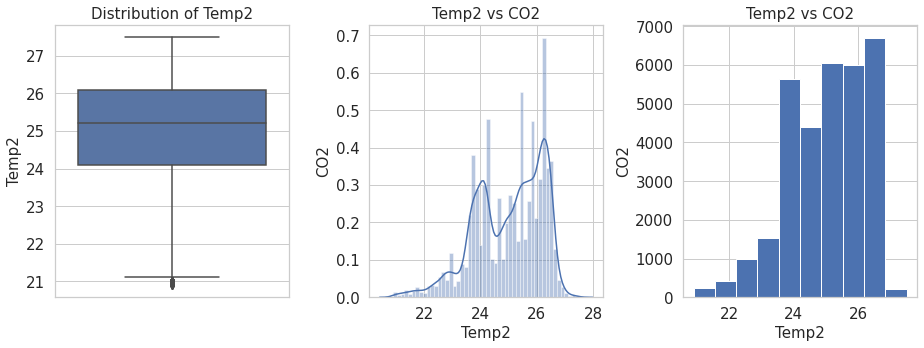

In [24]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Temp2',data=data,orient='v',ax=ax1)
ax1.set_ylabel('Temp2', fontsize=15)
ax1.set_title('Distribution of Temp2', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(data['Temp2'],ax=ax2)
ax2.set_xlabel('Temp2', fontsize=15)
ax2.set_ylabel('CO2', fontsize=15)
ax2.set_title('Temp2 vs CO2', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data['Temp2'])
ax3.set_xlabel('Temp2', fontsize=15)
ax3.set_ylabel('CO2', fontsize=15)
ax3.set_title('Temp2 vs CO2', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [25]:
fig = px.line(data, x='Date', y='Temp2')
fig.show()

**Humidity**

Range of values observed

In [26]:
print('Range of values:', data['Humi'].max()-data['Humi'].min())

Range of values: 42.35


Central values

In [27]:
print('Minimum Humidity:', data['Humi'].min())
print('Maximum Humidity:',data['Humi'].max())
print('Mean value:', data['Humi'].mean())
print('Median value:',data['Humi'].median())
print('Standard deviation:', data['Humi'].std())
print('Null values:',data['Humi'].isnull().any())

Minimum Humidity: 17.65
Maximum Humidity: 60.0
Mean value: 27.18441791045134
Median value: 26.67
Standard deviation: 2.8958427007566776
Null values: False


Quartiles

In [28]:
Q1=data['Humi'].quantile(q=0.25)
Q3=data['Humi'].quantile(q=0.75)
print('1st Quartile (Q1) is:', Q1)
print('3st Quartile (Q3) is:', Q3)
print('Interquartile range (IQR) is', Q3-Q1)

1st Quartile (Q1) is: 26.67
3st Quartile (Q3) is: 27.84
Interquartile range (IQR) is 1.1699999999999982


Outlier detection from Interquartile range (IQR) in original data

In [29]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Humidity:', L_outliers)
print('Upper outliers in Humidity:', U_outliers)

Lower outliers in Humidity: 24.915000000000006
Upper outliers in Humidity: 29.595


In [30]:
print('Number of outliers in Humidity upper:', data[data['Humi']>29.595]['Humi'].count())
print('Number of outliers in Humidity lower:', data[data['Humi']<24.91]['Humi'].count())
print('% of Outlier in Humidity upper:',round(data[data['Humi']>29.595]['Humi'].count()*100/len(data)), '%')
print('% of Outlier in Humidity lower:',round(data[data['Humi']<24.91]['Humi'].count()*100/len(data)), '%')

Number of outliers in Humidity upper: 6700
Number of outliers in Humidity lower: 7627
% of Outlier in Humidity upper: 21.0 %
% of Outlier in Humidity lower: 23.0 %


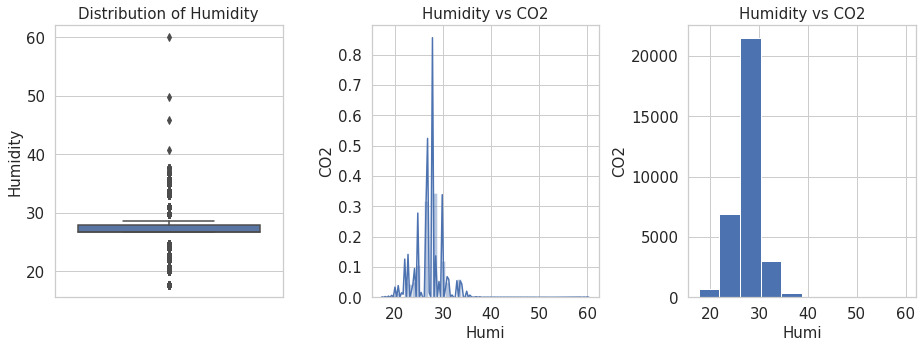

In [31]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Humi',data=data,orient='v',ax=ax1)
ax1.set_ylabel('Humidity', fontsize=15)
ax1.set_title('Distribution of Humidity', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(data['Humi'],ax=ax2)
ax2.set_xlabel('Humi', fontsize=15)
ax2.set_ylabel('CO2', fontsize=15)
ax2.set_title('Humidity vs CO2', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data['Humi'])
ax3.set_xlabel('Humi', fontsize=15)
ax3.set_ylabel('CO2', fontsize=15)
ax3.set_title('Humidity vs CO2', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [32]:
fig = px.line(data, x='Date', y='Humi')
fig.show()

## Description of dependent attribute

**CO2**


To carry out the study of whether or not a person is in the area to be studied, the CO2 level in said space will be studied.

It is possible to determine the arrival or departure time of a person from the studied space.

For this, it is based on the assumption that if the CO2 level decreases, then the person leaves the space, therefore if a person is present in said space, the concentration level of

In [33]:
# Plotting CO2 graphic
fig = px.line(data, x='Date', y='CO2')
fig.show()

Very pronounced peaks are seen on the day 1-04-2019 and the day 18-04-2019, so the following graph will proceed to study one of those days.

In [34]:
df = data.copy()
df['Date'] = pd.to_datetime(df['Date'])
mask = (df['Date'] > '2019-04-18') & (df['Date'] <= '2019-04-19')
df = df.loc[mask]
df = df.rename(columns={'Y_Value': 'CO2'})
fig = px.line(df, x='Date', y='CO2')
fig.show()

It can be seen how in the space of time between 00:00 and 03:50, the CO2 concentration is significantly deficient; this maybe since no one is found in the building, in this case, we refer to Ostrava's faculty of electrical engineering and computing.

However, from 04:00 hours until 05:55, the CO2 level increases until reaching the maximum peak of 1255 ppm, which indicates the presence of people in the building.
So we can deduce that the rapid increases are due to the presence of people, finding the windows and doors closed and without forced ventilation.

The points where there is a rapid decrease implies that the ventilation systems have been activated, or windows and doors have been opened.

Finally, it is also possible to determine the level of CO2 dispersion, since its progression is slower as it decreases over time, as would be seen in the graph after 3:00 p.m., the ppm levels decrease.

>## 3.2 Multivariate analysis

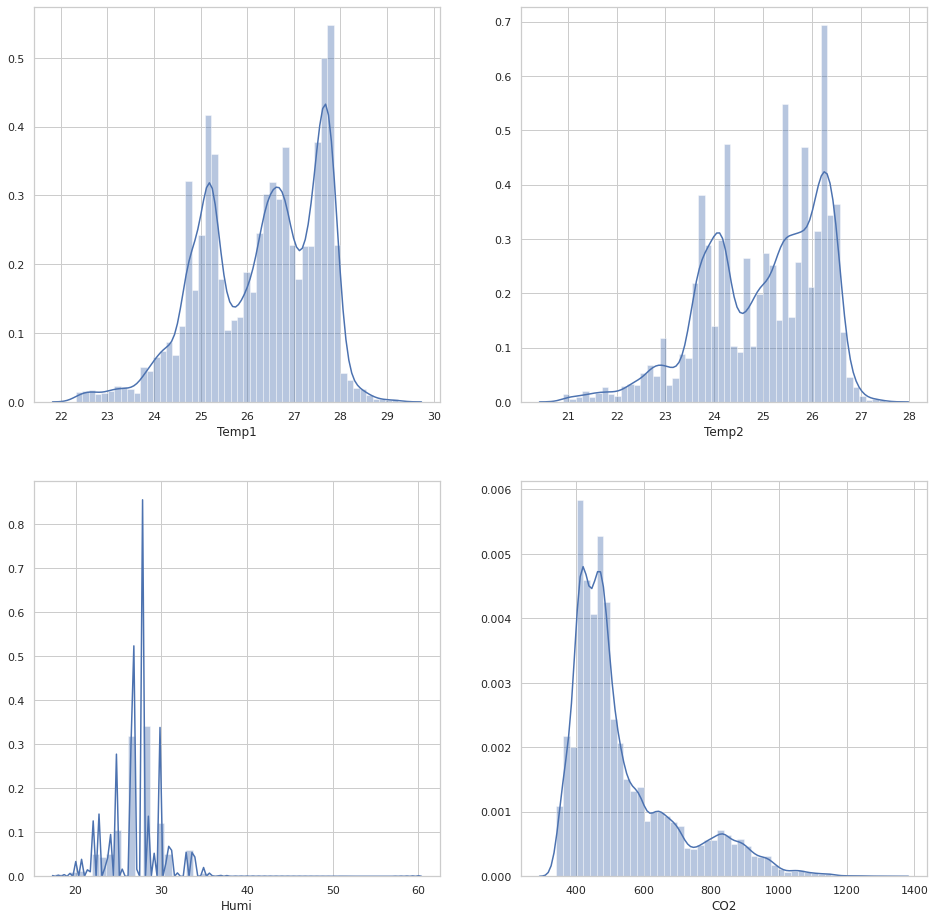

In [35]:
# Distplot
fig, ax2 = plt.subplots(2, 2, figsize=(16, 16))
sns.distplot(data['Temp1'],ax=ax2[0][0])
sns.distplot(data['Temp2'],ax=ax2[0][1])
sns.distplot(data['Humi'],ax=ax2[1][0])
sns.distplot(data['CO2'],ax=ax2[1][1])

We can see observe that :
*   CO2 has almost two gaussians and rightly skewed.
*   Humidity has multiple gaussians.
*   Temp1 has three gaussians.
*   Temp2 has almost two gaussians.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f740c7a7860>,
      dtype=object)

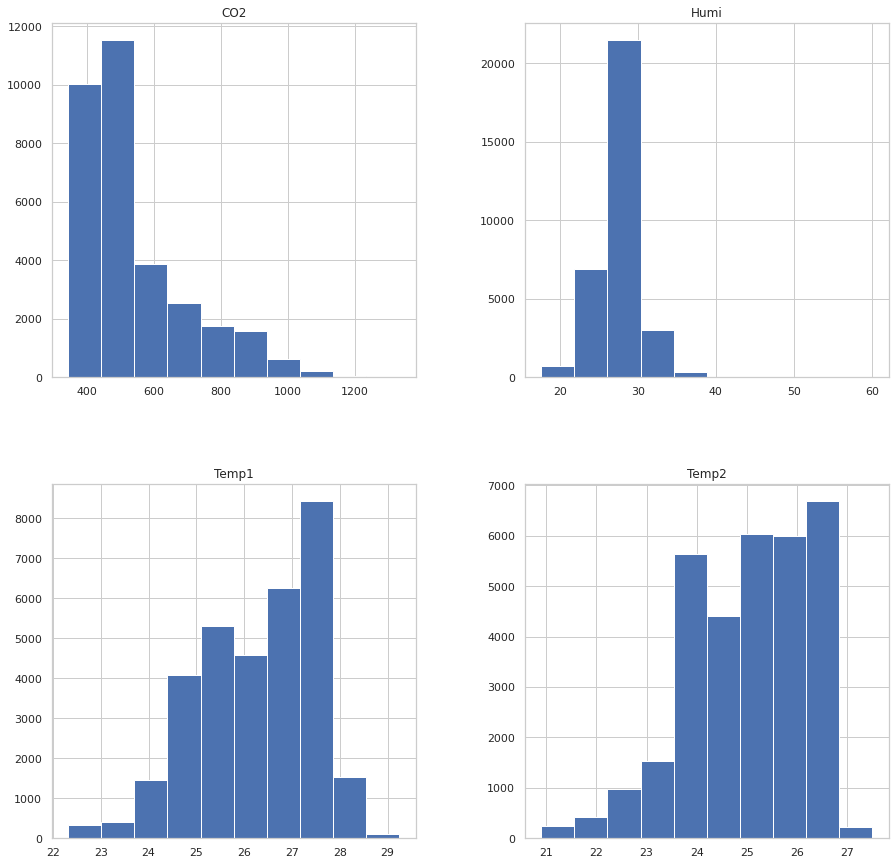

In [36]:
# Histogram 
data.hist(figsize=(15,15))

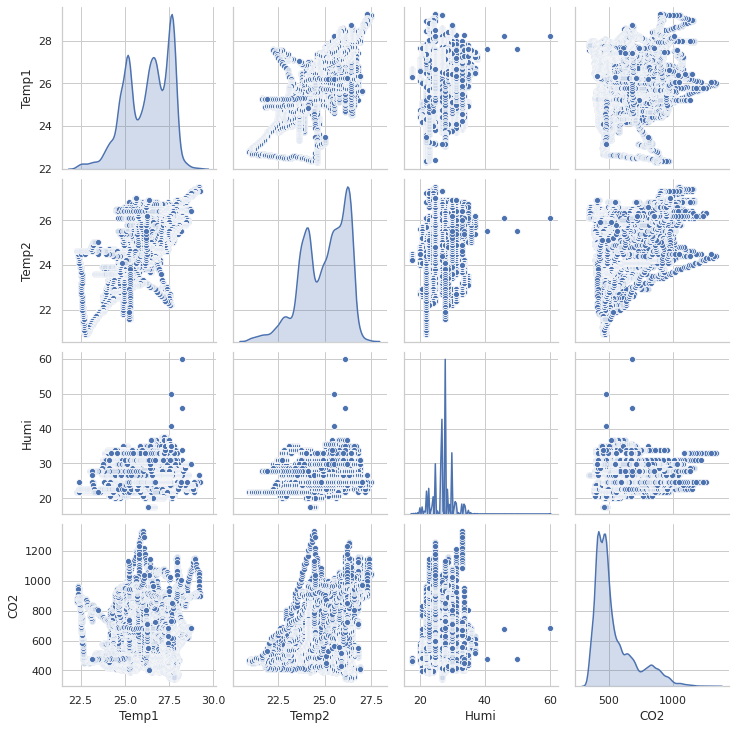

In [37]:
#pairplot- plot density curve instead of histogram in diagonal
sns.pairplot(data, diag_kind='kde')

The diagonal gives the same information, we got using distplot.

*   Temp1 attribute, It do not show presence of outliers.
*   Temp2 attribute, It shows presence of outliers.
*   Humidity attibute, It shows multiple presence of outliers.
*   CO2 attribute, is close to a normal curve 

**We not only have missing values problem but also outliers problem in the dataset.**

**Off Diagonal Analysis: Relationship between indpendent attributes**


**Scatter plots**


*   Temp1 vs. the other attributes: it only shows that can be a high level of correlation with the attribute Temp2, due to both curves are similar.
*   Temp2 vs. other independends attributes: This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud
*   Humidity vs other independs attributes: This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud.

*The reason why we are doing all this analysis is if we find any kind of dimensions which are very strongly correlated (r value close to 1 or -1) such dimensions are giving same information to your algorithms, its a redundant dimension*



In [38]:
# corrlation matrix 
cor=data.corr()
cor

Temp1     Temp2      Humi       CO2
Temp1  1.000000  0.856382 -0.057402  0.001470
Temp2  0.856382  1.000000 -0.033809  0.143970
Humi  -0.057402 -0.033809  1.000000 -0.103243
CO2    0.001470  0.143970 -0.103243  1.000000

Here, we can see the correlation value between the attributes.

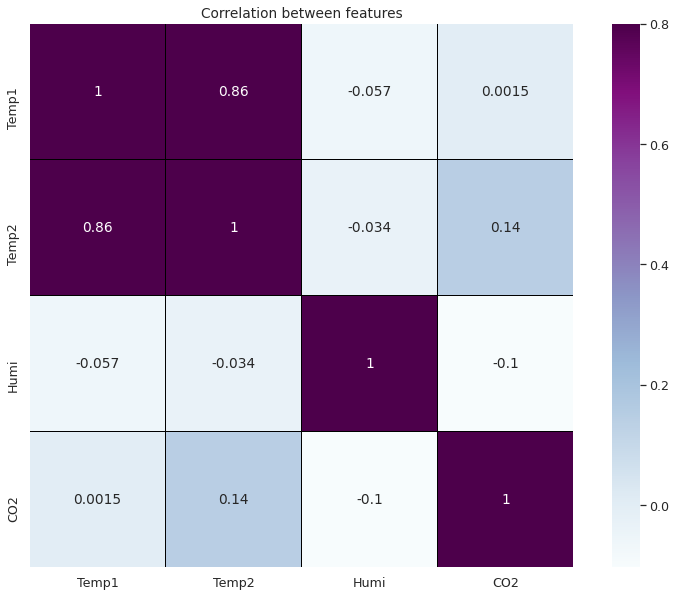

In [39]:
#heatmap
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(cor, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="BuPu",linecolor="black")
plt.title('Correlation between features');

It is also giving the same information we observed in pairplot analysis.
We can see how the correlation between the attributes Temp1 and Temp2 is high, so it does not provide information, being an attribute which may possibly be eliminated if the correlation would be higher or equal than 0.95


> ## 3.3. Strategies to handle different data challenges

#### Checking for Missing Values

In [40]:
#Checking for missing values
del data['Date']
data.isnull().sum()

Temp1      0
Temp2    324
Humi       0
CO2      281
dtype: int64

We can see that there are missing values.

**Checking for outliers**

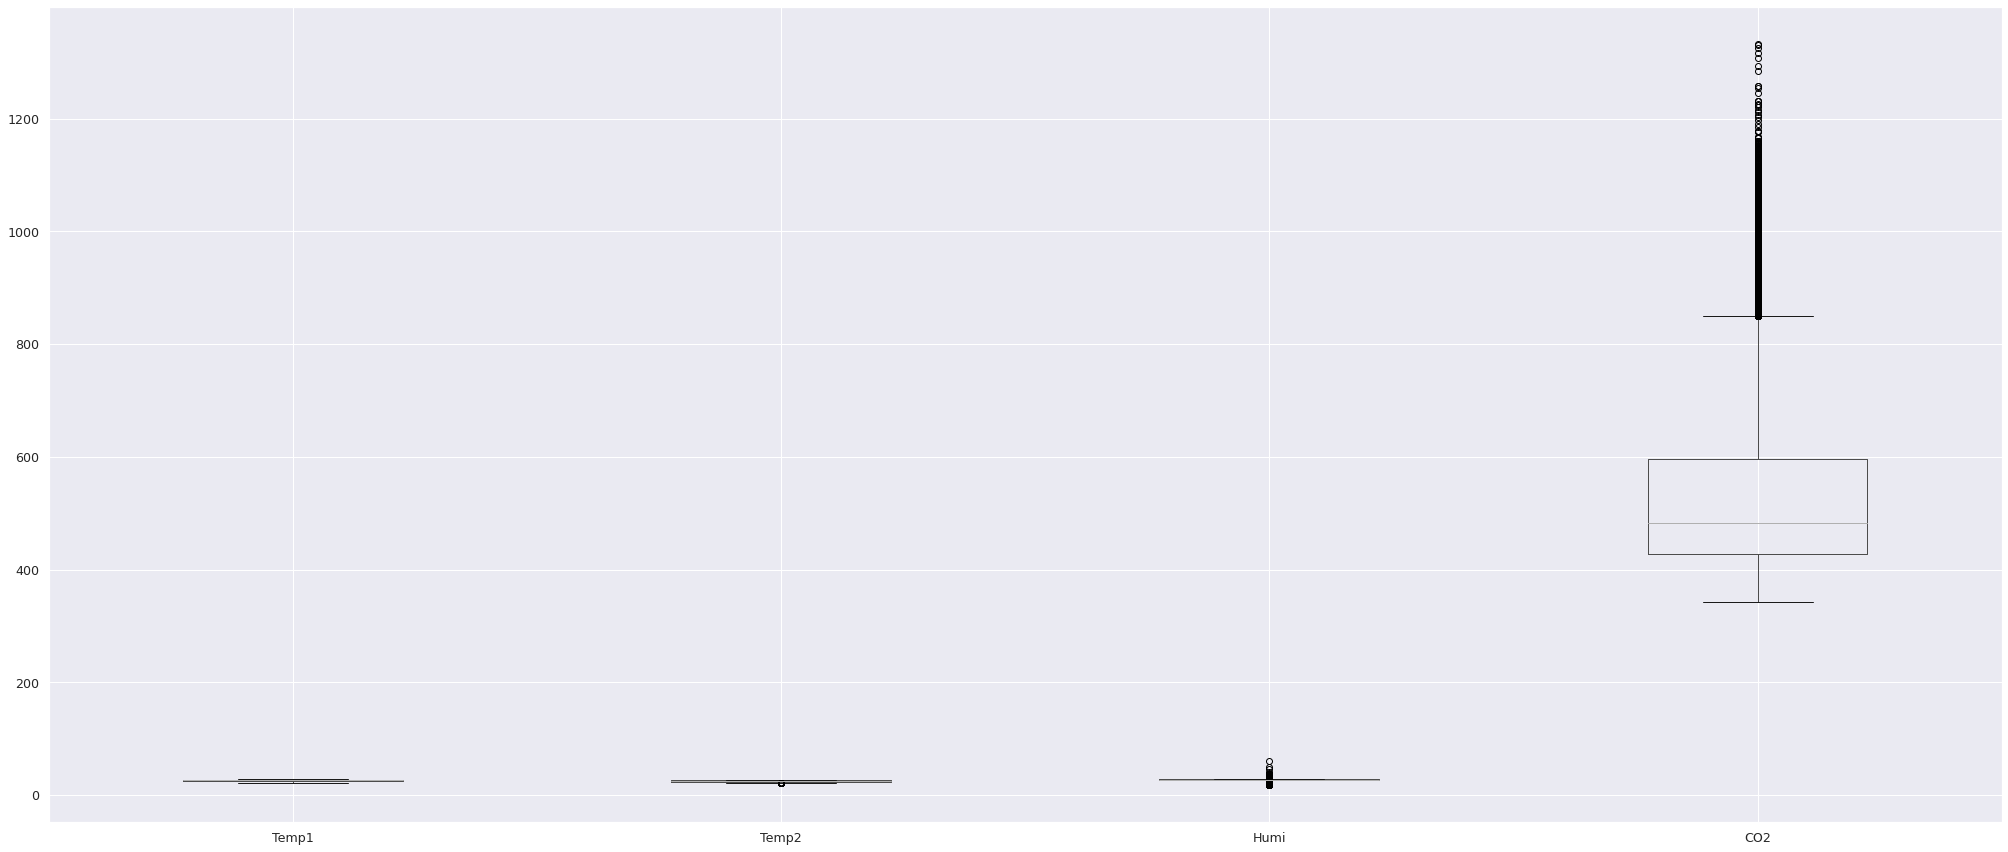

In [41]:
# Creating copy of original dataset
df1=data.copy()
# again check for outliers in dataset after handling missing values using boxplot
df1.boxplot(figsize=(35,15))

It also shows that Humidity, Temp1, Temp2 and CO2 contains outliers.

In [42]:
#Number of outliers present in the dataset
print('Number of outliers in Temp1:',df1[((df1.Temp1 - df1.Temp1.mean()) / df1.Temp1.std()).abs() >3]['Temp1'].count())
print('Number of outliers in Temp2:',df1[((df1.Temp2 - df1.Temp2.mean()) / df1.Temp2.std()).abs() >3]['Temp2'].count())
print('Number of outliers in Humidity:',df1[((df1.Humi - df1.Humi.mean()) / df1.Humi.std()).abs() >3]['Humi'].count())
print('Number of outliers in CO2:',df1[((df1.CO2 - df1.CO2.mean()) / df1.CO2.std()).abs() >3]['CO2'].count())

Number of outliers in Temp1: 96
Number of outliers in Temp2: 153
Number of outliers in Humidity: 175
Number of outliers in CO2: 333


Here, we have used Standard deviation method to detect the outliers.If we have any data point that is more than 3 times the standard deviation, then those points are very likely to be outliers.
We can see that Temp1, Temp2, Humidity and CO2 contain outliers.

**Handling the outliers**

The alternatives proposed to deal with outliers will be substituting the outlier for the median or eliminating the pattern that has outliers.

In  carrying  out  this  research,  the  elimination  of  those  patterns  with  outliers  has  been chosen, since replacing the median does not make sense, since false information is being generated that has no a priori benefit.

Here an example about how replace by median works:

In [0]:
#Replacing the outliers by median
for col_name in df1.columns:
    q1 = df1[col_name].quantile(0.25)
    q3 = df1[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    df1.loc[(df1[col_name] < low) | (df1[col_name] > high), col_name] = df1[col_name].median()

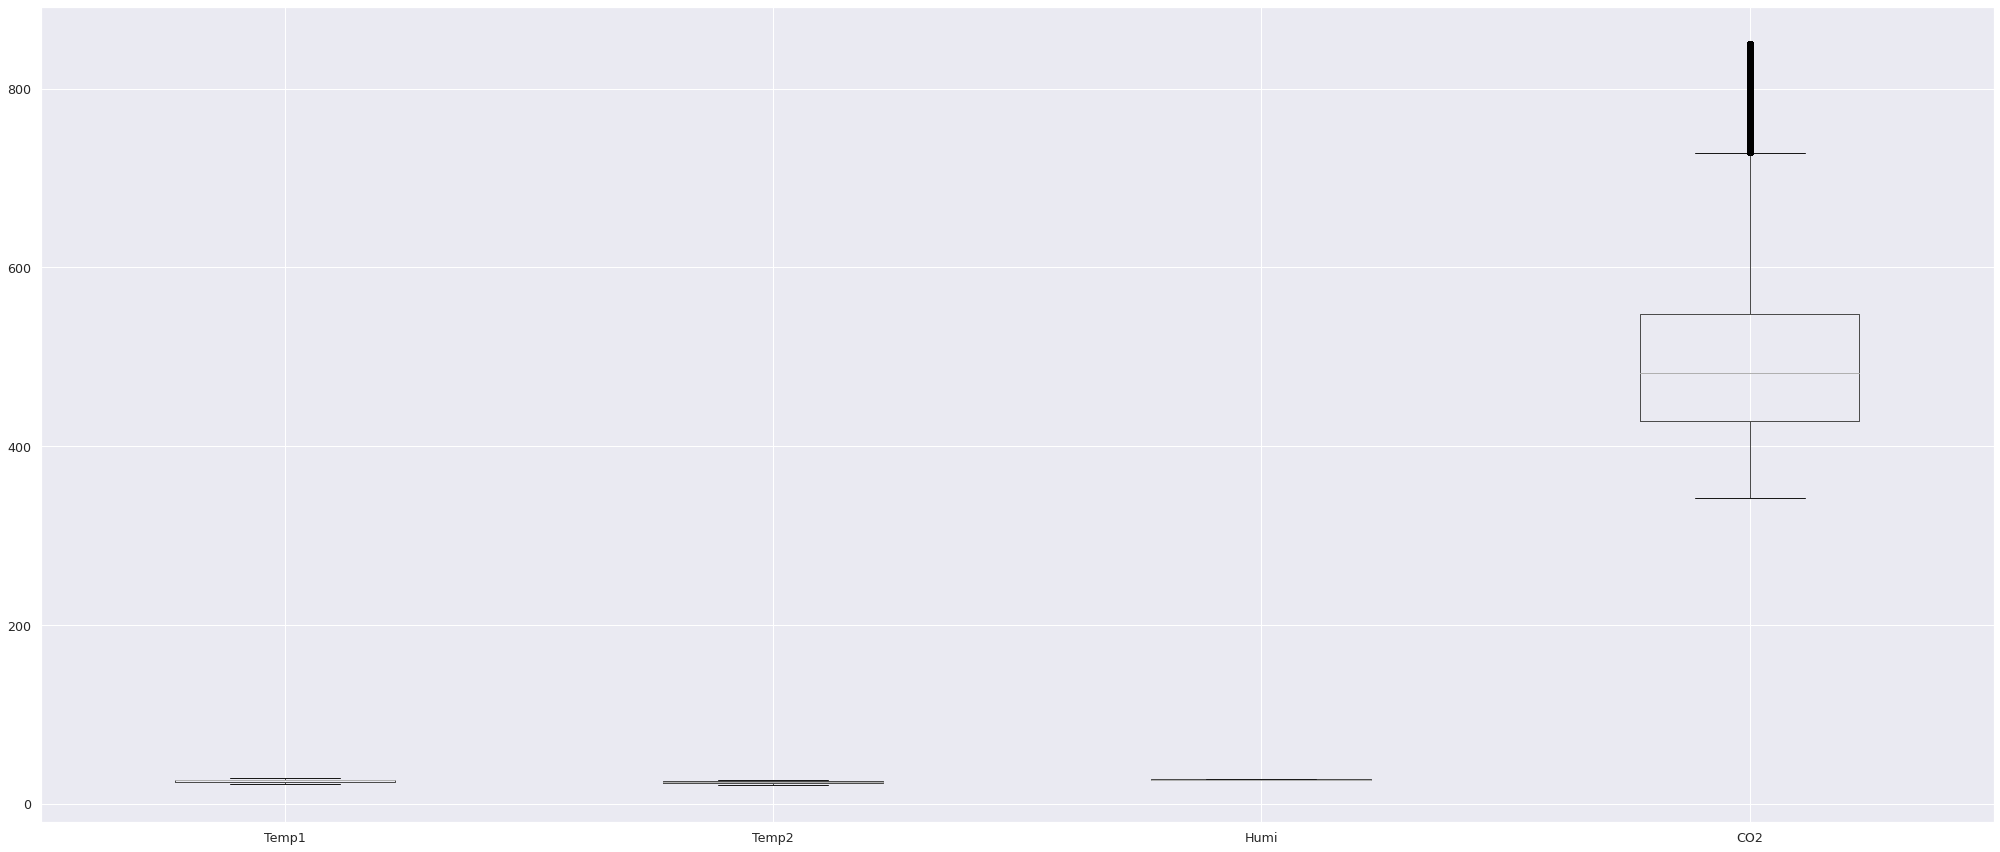

In [44]:
# again check for outliers in dataset using boxplot
df1.boxplot(figsize=(35,15))

#### Preprocessing datasets


In [0]:
def missingDataMean(data, missingData):
    """Replace all missing values of the each column with the mean
    Arguments:
        data {[Dataframe]} -- [Dataframe]
        missingData {[List]} -- [Current missing values]  
    """    
    numPatterns = data.shape[0]
    # Remove attributes with >= 80% missing values
    for index, value in enumerate(missingData):
        if value/numPatterns >= 0.8:
            data.drop([list(data.columns[:-1])[index]], axis=1, inplace=True)    
    # Replace missing values by mean
    data.fillna(data.mean(), inplace=True)
def normalizeDataset(df):
    """Normalize the current dataset between max and min values of each column
    Arguments:
        data {[df]} -- [Dataframe]
    """   
    df = (df - df.min()) / (df.max() - df.min())
    return df
def interpolateData(df):
    """Replace all missing values of the each column with interpolation method
    Arguments:
        df {[Dataframe]} -- [Dataframe]
    """   
    for (columnName, columnData) in data.iteritems():
        columnData.interpolate(method='linear', inplace=True)
    return df    
def delete_outliers(df1):
    """Delete all outlier values
    Arguments:
        df {[Dataframe]} -- [Dataframe]
    """     
    # Outliers detection and remove
    data = df1.copy()
    for i in data.columns:
            data_dict = data[((data[i] - data[i].mean()) / data[i].std()).abs() >3][i].to_dict()
            for key in data_dict:
                data = data.drop(key)
    return data

In [0]:
# Loop all files in current directory
for file in os.listdir("file_output"):
  # Only these files with .csv extension
    if fnmatch.fnmatch(file, '*.csv'):
        # Read each file
        data = pd.read_csv("file_output/"+file, na_values = missing_values, sep=",")
        # Delete date attribute
        del data['Date']
        # Create correlation matrix
        corr_matrix = data.corr().abs()
        # Select upper triangle of correlation matrix
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
        # Find index of feature columns with correlation greater than 0.95
        to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]        
        # Drop features with high correlation
        data = data.drop(data[to_drop], axis=1)
        # Remove outliers
        data = delete_outliers(data)
        # Missing values detection
        missingData = list(data.isnull().sum())
        # If missing values is missing = replace by mean or interpolation
        if data.isnull().values.any():
            #missingDataMean(data, missingData)
            interpolateData(data)    
        data = normalizeDataset(data)
        data = data.drop_duplicates(keep="first", inplace=False)    
        # Delete all empty rows
        data = data.dropna(axis=0, how='all', thresh=None, subset=None, inplace=False)         # Re-insert Date attr and put in first attr position
        data.to_csv("Preprocesed_"+file, index=False, header=True, decimal=".", sep=",", float_format='%.5f')
        Path("Preprocesed_"+file).rename("./dataset/final/Preprocesed_"+file)

Preprocesed output files features:

*   All attributes is in the same scale between 0 and 1.
*   Outliers have been deleted.
*   Missing Values have been replaced by mean / interpolation.
*   Correlated attributes have been deleted.
*   Duplicate values have been removed


#### Output Dataset Visualization

In [47]:
# Use april preprocesed file to display info
data = pd.read_csv("dataset/final/Preprocesed_april_output.csv", sep=",")
# Display the new dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21501 entries, 0 to 21500
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp1   21501 non-null  float64
 1   Temp2   21501 non-null  float64
 2   Humi    21501 non-null  float64
 3   CO2     21501 non-null  float64
dtypes: float64(4)
memory usage: 672.0 KB


In [48]:
#Check top few records of the dataset
data.head()

Temp1    Temp2     Humi      CO2
0  0.31642  0.32203  0.49968  0.12326
1  0.31343  0.32203  0.49968  0.12326
2  0.31642  0.32203  0.49968  0.11990
3  0.31343  0.32203  0.49968  0.11847
4  0.31343  0.32203  0.49968  0.11559

In [49]:
#Analyze the distribution of the dataset
data.describe().T

count      mean       std  min      25%      50%      75%  max
Temp1  21501.0  0.552830  0.182828  0.0  0.39701  0.58209  0.71343  1.0
Temp2  21501.0  0.606182  0.202655  0.0  0.45763  0.64407  0.77966  1.0
Humi   21501.0  0.456490  0.188927  0.0  0.30019  0.42511  0.55003  1.0
CO2    21501.0  0.317646  0.235386  0.0  0.14101  0.22494  0.44221  1.0

In [50]:
# corrlation matrix 
cor=data.corr()
cor

Temp1     Temp2      Humi       CO2
Temp1  1.000000  0.814804 -0.078072  0.027226
Temp2  0.814804  1.000000 -0.028192  0.174716
Humi  -0.078072 -0.028192  1.000000 -0.141705
CO2    0.027226  0.174716 -0.141705  1.000000

In [51]:
fig = go.Figure()
# Represent boxplot
fig.add_trace(go.Box(x=data['Temp1'],name='Temp1'))
fig.add_trace(go.Box(x=data['Temp2'],name='Temp2'))
fig.add_trace(go.Box(x=data['Humi'],name='Humidity'))
fig.add_trace(go.Box(x=data['CO2'],name='CO2'))
fig.show()

# Algorithms Comparison

In [0]:
def GetBasedModel():
    models = []
    models.append(('LN', linear_model.LinearRegression())) #(Regression - Supervised)
    models.append(('RID', Ridge())) #(Regression - Supervised)
    models.append(('LSO', Lasso())) #(Regression - Supervised)
    models.append(('EN',  ElasticNet())) #(Regression - Supervised)  
    models.append(('SVR', SVR())) #(Regression - Supervised)    
    return models

In [0]:
class PlotBoxR(object):
    def __Trace(self,nameOfFeature,value): 
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):      
        data = []
        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))
        py.iplot(data)

In [0]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}"     
        return float(prc.format(f_val))
    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))
    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [0]:
def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()
    elif nameOfScaler == 'Robust':
        scaler= RobustScaler()
    elif nameOfScaler == 'normalizer':
        scaler= Normalizer()
        
    pipelines = []
    pipelines.append((nameOfScaler+'LN'  , Pipeline([('Scaler', scaler),('LN',  linear_model.LinearRegression())])))
    pipelines.append((nameOfScaler+'RID'  , Pipeline([('Scaler', scaler),('RID',  Ridge())])))
    pipelines.append((nameOfScaler+'LSO'  , Pipeline([('Scaler', scaler),('LSO',  Lasso())])))
    pipelines.append((nameOfScaler+'EN'  , Pipeline([('Scaler', scaler),('EN',  ElasticNet())])))
    pipelines.append((nameOfScaler+'SVR'  , Pipeline([('Scaler', scaler),('SVR',  SVR())])))
    return pipelines 

In [0]:
df  = pd.read_csv('dataset/final/Preprocesed_april_output.csv', sep=",")

In [0]:
X = df.iloc[:,:-1] # X is all attributes whitout CO2
Y = df.iloc[:,-1] # Y is CO2 column
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)

In [58]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((17200, 3), (4301, 3), (17200,), (4301,))

In [0]:
 def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 5
    scoring = 'r2'
    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=num_folds, random_state=42)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [60]:
models = GetBasedModel()
print("Name   MSE   STD")
names,results = BasedLine2(X_train, y_train,models)
fig = go.Figure()
# Represent boxplot
for i in range(len(results)):
  fig.add_trace(go.Box(y=results[i],name=names[i]))
fig.show()

Name   MSE   STD
LN: 0.091777 (0.006949)
RID: 0.091772 (0.006905)
LSO: -0.000362 (0.000335)
EN: -0.000362 (0.000335)
SVR: 0.417924 (0.010753)


In [61]:
basedLineScore = ScoreDataFrame(names,results)
basedLineScore.sort_values(by='Score', ascending=False)

Model   Score
4   SVR  0.4179
0    LN  0.0918
1   RID  0.0918
2   LSO -0.0004
3    EN -0.0004

In [62]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, y_train,models)

scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

standardLN: 0.091777 (0.006949)
standardRID: 0.091777 (0.006948)
standardLSO: -0.000362 (0.000335)
standardEN: -0.000362 (0.000335)
standardSVR: 0.431226 (0.011173)


Model   Score        Model   Score
0    LN  0.0918   standardLN  0.0918
1   RID  0.0918  standardRID  0.0918
2   LSO -0.0004  standardLSO -0.0004
3    EN -0.0004   standardEN -0.0004
4   SVR  0.4179  standardSVR  0.4312

In [63]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train,models)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

minmaxLN: 0.091777 (0.006949)
minmaxRID: 0.091772 (0.006905)
minmaxLSO: -0.000362 (0.000335)
minmaxEN: -0.000362 (0.000335)
minmaxSVR: 0.417924 (0.010753)


Model   Score        Model   Score      Model   Score
0    LN  0.0918   standardLN  0.0918   minmaxLN  0.0918
1   RID  0.0918  standardRID  0.0918  minmaxRID  0.0918
2   LSO -0.0004  standardLSO -0.0004  minmaxLSO -0.0004
3    EN -0.0004   standardEN -0.0004   minmaxEN -0.0004
4   SVR  0.4179  standardSVR  0.4312  minmaxSVR  0.4179

In [64]:
models = GetScaledModel('normalizer')
names,results = BasedLine2(X_train, y_train,models)

scaledScoreNormal = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,scaledScoreNormal], axis=1)
compareModels

normalizerLN: 0.101320 (0.006462)
normalizerRID: 0.101313 (0.006409)
normalizerLSO: -0.000362 (0.000335)
normalizerEN: -0.000362 (0.000335)
normalizerSVR: 0.203573 (0.008605)


Model   Score        Model   Score      Model   Score          Model   Score
0    LN  0.0918   standardLN  0.0918   minmaxLN  0.0918   normalizerLN  0.1013
1   RID  0.0918  standardRID  0.0918  minmaxRID  0.0918  normalizerRID  0.1013
2   LSO -0.0004  standardLSO -0.0004  minmaxLSO -0.0004  normalizerLSO -0.0004
3    EN -0.0004   standardEN -0.0004   minmaxEN -0.0004   normalizerEN -0.0004
4   SVR  0.4179  standardSVR  0.4312  minmaxSVR  0.4179  normalizerSVR  0.2036

In [65]:
models = GetScaledModel('Robust')
names,results = BasedLine2(X_train, y_train,models)

scaledScoreRobust = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,scaledScoreNormal,scaledScoreRobust], axis=1)
compareModels

RobustLN: 0.091777 (0.006949)
RobustRID: 0.091777 (0.006945)
RobustLSO: -0.000362 (0.000335)
RobustEN: -0.000362 (0.000335)
RobustSVR: 0.422471 (0.011980)


Model   Score        Model   Score  ...          Model   Score      Model   Score
0    LN  0.0918   standardLN  0.0918  ...   normalizerLN  0.1013   RobustLN  0.0918
1   RID  0.0918  standardRID  0.0918  ...  normalizerRID  0.1013  RobustRID  0.0918
2   LSO -0.0004  standardLSO -0.0004  ...  normalizerLSO -0.0004  RobustLSO -0.0004
3    EN -0.0004   standardEN -0.0004  ...   normalizerEN -0.0004   RobustEN -0.0004
4   SVR  0.4179  standardSVR  0.4312  ...  normalizerSVR  0.2036  RobustSVR  0.4225

[5 rows x 10 columns]

# SVR Parameters Optimization

Nested cross-validation is used to estimate generalization performance of a full learning pipeline, which includes optimizing hyperparameters. We will use five folds in the outer loop.

## **Parameters to optimice**
**C (Regularisation)**: C is the penalty parameter. The higher the Penalty value the model makes fewer mistakes but it is observed that after a certain Penalty value the model is over training.

**Gamma**: It defines how far influences the calculation of plausible line of separation. The higher the gamma value, only near points are considered.
A lower gamma value, far away points are also considered.

**epsilon**: It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

## Optimizing Parameters


## How to optimize the parameters

**Score:** Return the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares.

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [0]:
def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print ('MSE: %2.3f' % mse)
    return mse

def R2(y_true,y_pred):    
     r2 = r2_score(y_true, y_pred)
     print ('R2: %2.3f' % r2)
     return r2

def two_score(y_true,y_pred):    
    MSE(y_true,y_pred) #set score here and not below if using MSE in GridCV
    score = R2(y_true,y_pred)
    return score

def two_scorer():
  return make_scorer(two_score, greater_is_better=True) # change for false if using MSE

In [0]:
class RandomSearch(object):    
    def __init__(self,X_train,y_train,model,hyperparameters):        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        self.best_score = []
        self.best_params = []        
    def RandomSearch(self):
        # Create randomized search 53-fold cross validation and 20 iterations
        cv = 3
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=20,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 scoring=two_scorer(),
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        self.best_score.append(best_model.best_score_)
        self.best_params.append(best_model.best_params_)
        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred

class GridSearch(object):    
    def __init__(self,X_train,y_train,model,hyperparameters):        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        self.best_score = []
        self.best_params = []
        
    def GridSearch(self):
        # Create randomized search 3-fold cross validation
        cv = 3
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 refit=True,
                                 error_score=0,
                                 scoring=two_scorer(),
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        self.best_score.append(best_model.best_score_)
        self.best_params.append(best_model.best_params_)                 
        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred        

In [0]:
# Range of parameters to optimize
kernel = ['rbf']
gamma = np.logspace(-15, 3, num=9, base=2)
tol = [0.0001]
C = np.logspace(-5, 15, num=11, base=2)
epsilon = [0.1]

# Create hyperparameter dictionary
hyperparameters= dict(
  kernel = kernel,
  gamma = gamma,
  tol = tol,
  C = C,
  epsilon = epsilon
)

### Search best parameters with the whole dataset preprocesed

### Fit the current model


In [69]:
data  = pd.read_csv('dataset/final/Preprocesed_march_output.csv', sep=",")
# X is all attributes whitout CO2
X = data.iloc[:,:-1] 
# Y is CO2 column
Y = data.iloc[:,-1] 
# Split the dataset in 4 part two train and two test with 20% patterns for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=44)
# Get the current size of each part
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Start timer
start = time.time()  
# Use StandarScaler to scale features
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
rescaledValidationX = scaler.transform(X_test)
# Apply RandomSearch or GridSearch to find parameters of SVR
gs = RandomSearch(rescaledX, y_train, model, hyperparameters)
Prediction = gs.BestModelPridict(rescaledValidationX)

# End timer and 
end = time.time() 
temp = end-start   
hours = temp//3600
temp = temp - 3600*hours
minutes = temp//60
seconds = temp - 60*minutes
# Print the results
print('%d:%d:%d' %(hours,minutes,seconds),'R2 Score:', gs.best_score, gs.best_params)

(14471, 3) (3618, 3) (14471,) (3618,)
15:12:37 R2 Score: [0.5212317821441989] [{'tol': 0.0001, 'kernel': 'rbf', 'gamma': 8.0, 'epsilon': 0.1, 'C': 512.0}]


### Testing the model

In [140]:
data  = pd.read_csv('dataset/final/Preprocesed_march_output.csv', sep=",")
# X is all attributes whitout CO2
X = data.iloc[:,:-1] 
# Y is CO2 column
Y = data.iloc[:,-1] 
# Split the dataset in 4 part two train and two test with 20% patterns for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=44)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = SVR(
        tol=0.0001,
        kernel='rbf',
        gamma=8.0,
        epsilon=0.01,
        C=512,      
)
model.fit(X_train, y_train)
# estimate accuracy on validation dataset
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)
print("Performance on training data:",model.score(X_train, y_train))
print("Performance on test data:",model.score(X_test, y_test))
# Evaluate the model using accuracy
print('Accuracy:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print('MAE:',mean_absolute_error(y_test, y_pred))

Performance on training data: 0.9013106611568023
Performance on test data: 0.8738232839948042
Accuracy: 0.8738232839948044
MSE: 0.005906655159650314
MAE: 0.02784043536777087


In [0]:
numPatterns = 100
ypred = list(y_pred[:numPatterns])
ytest = list(y_test[:numPatterns])
index = list(i for i in range(numPatterns))

In [74]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=index,
        y=ytest,
        name='Test Value'
    ))
fig.add_trace(
    go.Scatter(
        x=index,
        y=ypred,
        name='Predicted Value'
    ))
fig.update_layout(
    title="Real Values Vs Predicted Values",
    xaxis_title="Instances",
    yaxis_title="CO2 Level",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()